In [13]:
import pandas as pd
import numpy as np
import os
os.getcwd()

'/Users/abhirai/AnacondaProjects'

In [14]:
df_train = pd.read_csv('../datasets/lin_reg/train.csv')
df_test = pd.read_csv('../datasets/lin_reg/test.csv')
combine = [df_train, df_test]

In [15]:
x_train = np.array(df_train['x'])
y_train = np.array(df_train['y'])
x_test = np.array(df_test['x'])
y_test = np.array(df_test['y'])
x_train = x_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)
y_train = y_train.reshape(-1, 1)
y_train.shape

(700, 1)

In [16]:
y_train = y_train.astype(int)

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

clf = LinearRegression(normalize = True)
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)
1 - r2_score(y_test,y_pred)

6.153948703855994e+30

In [18]:
n = 700
alpha = 0.0001
a_0 = np.zeros((n,1))
a_1 = np.zeros((n,1))
epochs = 0

In [21]:
while (epochs < 15):
    y = a_0 + a_1 * x_train
    error = y - y_train
    mean_sqr = np.square(error)/n
    a_0 = a_0 - (alpha * 2 * np.sum(error)/n)
    a_1 = a_1 - (alpha * 2 * np.sum(error * x_train)/n)
    epochs += 1
    if(epochs%10 == 0):
        print(mean_sqr)

[[5.75178093e+39]
 [2.49615155e+40]
 [2.24708140e+39]
 [1.44182447e+40]
 [7.55701430e+40]
 [1.29405728e+40]
 [1.43825668e+39]
 [6.55063949e+40]
 [6.24102767e+39]
 [2.49848768e+38]
 [2.55662391e+39]
 [2.55662391e+39]
 [5.75178093e+39]
 [1.51870314e+40]
 [2.91148875e+40]
 [3.59439595e+40]
 [6.75024155e+39]
 [5.32062236e+40]
 [8.39768600e+39]
 [9.59581798e+39]
 [4.61675486e+40]
 [7.55701430e+40]
 [3.35877336e+40]
 [2.91148875e+40]
 [7.04484168e+40]
 [3.35877336e+40]
 [2.39730904e+40]
 [3.99446533e+39]
 [8.08715734e+40]
 [2.30046324e+40]
 [1.59944755e+38]
 [6.24102767e+39]
 [1.76131941e+40]
 [6.74488976e+31]
 [3.59439595e+40]
 [8.63527081e+40]
 [1.51870314e+40]
 [4.89558203e+38]
 [4.40384353e+39]
 [4.61675486e+40]
 [7.04484168e+40]
 [6.74488976e+31]
 [3.35877336e+40]
 [3.60505427e+39]
 [1.29405728e+40]
 [3.60505427e+39]
 [3.47558630e+40]
 [2.59699078e+40]
 [3.60505427e+39]
 [1.08738185e+40]
 [7.21356917e+40]
 [1.93304717e+40]
 [2.49848768e+38]
 [3.47558630e+40]
 [1.95750602e+39]
 [8.091361

In [22]:
print(a_0)
print(a_1)

[[-2.45755715e+20]
 [-2.45755715e+20]
 [-2.45755715e+20]
 [-2.45755715e+20]
 [-2.45755715e+20]
 [-2.45755715e+20]
 [-2.45755715e+20]
 [-2.45755715e+20]
 [-2.45755715e+20]
 [-2.45755715e+20]
 [-2.45755715e+20]
 [-2.45755715e+20]
 [-2.45755715e+20]
 [-2.45755715e+20]
 [-2.45755715e+20]
 [-2.45755715e+20]
 [-2.45755715e+20]
 [-2.45755715e+20]
 [-2.45755715e+20]
 [-2.45755715e+20]
 [-2.45755715e+20]
 [-2.45755715e+20]
 [-2.45755715e+20]
 [-2.45755715e+20]
 [-2.45755715e+20]
 [-2.45755715e+20]
 [-2.45755715e+20]
 [-2.45755715e+20]
 [-2.45755715e+20]
 [-2.45755715e+20]
 [-2.45755715e+20]
 [-2.45755715e+20]
 [-2.45755715e+20]
 [-2.45755715e+20]
 [-2.45755715e+20]
 [-2.45755715e+20]
 [-2.45755715e+20]
 [-2.45755715e+20]
 [-2.45755715e+20]
 [-2.45755715e+20]
 [-2.45755715e+20]
 [-2.45755715e+20]
 [-2.45755715e+20]
 [-2.45755715e+20]
 [-2.45755715e+20]
 [-2.45755715e+20]
 [-2.45755715e+20]
 [-2.45755715e+20]
 [-2.45755715e+20]
 [-2.45755715e+20]
 [-2.45755715e+20]
 [-2.45755715e+20]
 [-2.4575571

In [23]:
import matplotlib.pyplot as plt

y_prediction = a_0 + a_1 * x_test
print(r2_scores(y_test, y_prediction))

ValueError: operands could not be broadcast together with shapes (700,1) (300,1) 

ValueError: x and y can be no greater than 2-D, but have shapes (100,) and (100, 700, 1)

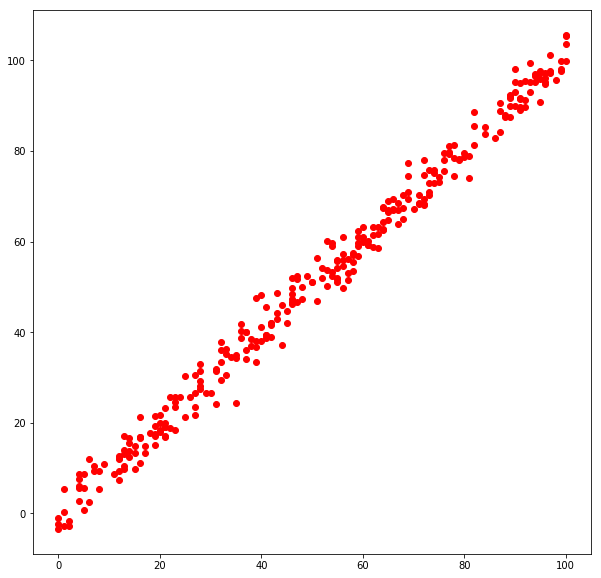

In [24]:
y_plot = []
for i in range(100):
    y_plot.append(a_0 + a_1 * i)
plt.figure(figsize=(10,10))
plt.scatter(x_test,y_test,color='red',label='GT')
plt.plot(range(len(y_plot)),y_plot,color='black',label = 'pred')
plt.legend()
plt.show()